In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=0.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hana/data/kospi.csv', encoding='cp949')

In [ ]:
df_name = pd.read_csv('/content/drive/MyDrive/hana/data/kospi_info.csv', encoding='cp949')

In [ ]:
col = ['종목코드', '대비', '시가', '고가', '저가', '거래대금']
df_drop = df.drop(columns=col).set_index('종목명')

In [ ]:
df_drop.head()

,종가,등락률,거래량,시가총액,상장주식수
종목명,,,,,
AJ네트웍스,4195,1.08,35369,189835324005,45252759
AK홀딩스,17790,-1.00,4478,235674110190,13247561
BGF,3655,2.81,341224,349844871105,95716791
BGF리테일,132500,2.40,173987,2290117545000,17283906
BNK금융지주,7160,-0.42,767912,2306153216080,322088438


# MinMaxScale

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_drop)

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=df_drop.columns)

# PCA

In [ ]:
pca = PCA()

# 데이터를 통해 PCA 모델 학습
pca.fit(scaled_df)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 주성분 중요도 확인
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Cumulative Explained Variance Ratio:
[0.54868312 0.79016253 0.92324564 0.99334128 1.        ]


In [ ]:
# 선택한 주성분의 수
n_components = 2

# 주성분 중요도에서 정보 손실율 계산
info_loss = 1 - cumulative_variance_ratio[n_components - 1]

print(f"\nInformation Loss with {n_components} Components: {info_loss:.4f}")



Information Loss with 2 Components: 0.2098


In [ ]:
# 주성분을 사용하여 데이터 변환
transformed_data = pca.transform(scaled_df)

# 두 개의 주성분으로 이루어진 데이터프레임 생성
transformed_df = pd.DataFrame(data=transformed_data[:, :2], columns=['PC1', 'PC2'], index=df_drop.index).reset_index()


# Final Dataset

In [ ]:
# 두 데이터프레임을 종목명을 기준으로 inner join
final_df = pd.merge(transformed_df, df_name[['한글 종목약명', '영문 종목명']], left_on='종목명', right_on='한글 종목약명', how='inner')

In [ ]:
# final_df.to_csv('final_data.csv', index=False, encoding='cp949')

In [ ]:
final_df['영문 종목명'] = final_df['영문 종목명'].str.split(' ').str[0].str[:5]

# Example. 삼성전자

In [ ]:
# 초기값 설정
target = final_df.loc[final_df['종목명'] == '삼성전자']
df_del_samsung = final_df.loc[final_df['종목명'] != '삼성전자']

# 딕셔너리 초기화
distance_dict = {}

# 각 종목에 대해 거리 계산 및 딕셔너리에 추가
for stock in df_del_samsung.values:
    distance = math.sqrt((stock[1] - target['PC1'])**2 + (stock[2] - target['PC2'])**2)
    distance_dict[stock[0]] = distance

# 거리를 기준으로 딕셔너리 정렬
sorted_distance = sorted(distance_dict.items(), key=lambda x: x[1])

# 결과 출력
closest_stock, min_distance = sorted_distance[0]
print(f"삼성전자와 가장 가까운 종목은 {closest_stock}이며, 거리는 {min_distance}입니다.")


삼성전자와 가장 가까운 종목은 에코프로머티이며, 거리는 0.01811165991968084입니다.


In [ ]:
sorted_distance[:3]

[('에코프로머티', 0.01811165991968084),
 ('금양', 0.02607918602248222),
 ('삼성에스디에스', 0.04957907359163507)]

# visualization

### All Data

<ipython-input-18-5006daa87511>:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('scatter_plot_high_resolution.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


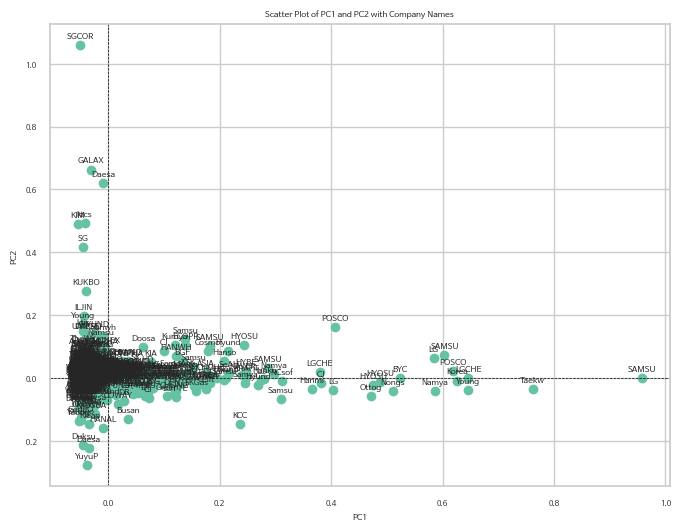

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])

# Annotate points with 종목명
for i in range(len(final_df)):
    plt.annotate(final_df['영문 종목명'][i], (final_df['PC1'][i], final_df['PC2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2 with Company Names')

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('scatter_plot_high_resolution.png', dpi=300)

# Show the plot
plt.show()

### Filtering Data

In [ ]:
final_df = final_df.iloc[:30]

<ipython-input-20-dd9e45c7b41f>:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('scatter_plot_high_resolution.png', dpi=300)


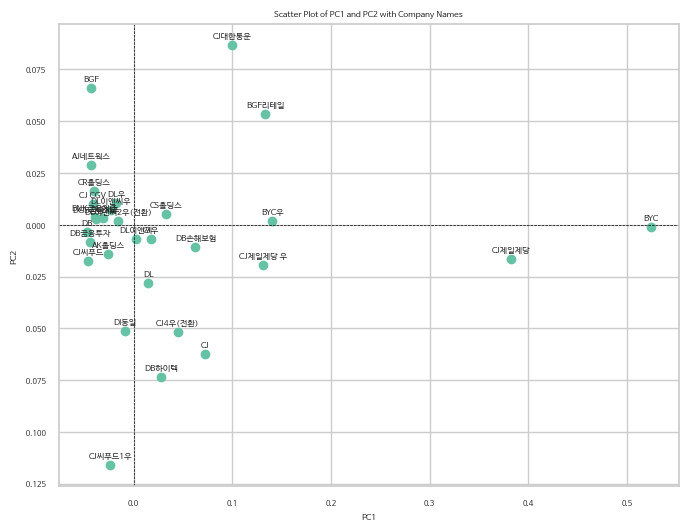

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])

# Annotate points with 종목명
for i in range(len(final_df)):
    plt.annotate(final_df['종목명'][i], (final_df['PC1'][i], final_df['PC2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2 with Company Names')

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('scatter_plot_high_resolution.png', dpi=300)

# Show the plot
plt.show()

### Make Polygon

In [ ]:
final_df['OX'] = 0

# 5개의 행에 랜덤으로 1 할당
random_rows = np.random.choice(final_df.index, 5, replace=False)
final_df.loc[random_rows, 'OX'] = 1

# 선택된 행을 제외하고 나머지 중에서 6개를 2로 채우기
remaining_rows = final_df[final_df['OX'] == 0].index.difference(random_rows)
additional_rows = np.random.choice(remaining_rows, 6, replace=False)
final_df.loc[additional_rows, 'OX'] = 2

<ipython-input-144-00ed8e3e1e9e>:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('scatter_plot_with_convex_hull.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


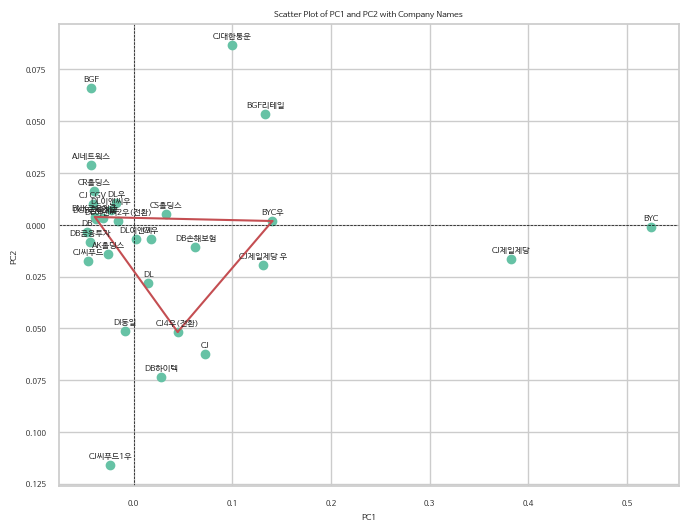

In [ ]:
from scipy.spatial import ConvexHull

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])

# Annotate points with 종목명
for i in range(len(final_df)):
    plt.annotate(final_df['종목명'][i], (final_df['PC1'][i], final_df['PC2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2 with Company Names')

# OX 값이 1인 행만 선택
selected_rows = final_df[final_df['OX'] == 1]

# Convex Hull 알고리즘을 사용하여 다각형 그리기
hull = ConvexHull(selected_rows[['PC1', 'PC2']])
for simplex in hull.simplices:
    plt.plot(selected_rows['PC1'].values[simplex], selected_rows['PC2'].values[simplex], 'r-')

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('scatter_plot_with_convex_hull.png', dpi=300)

# Show the plot
plt.show()

<ipython-input-120-b5db0ca8f889>:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('scatter_plot_with_multiple_convex_hulls.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


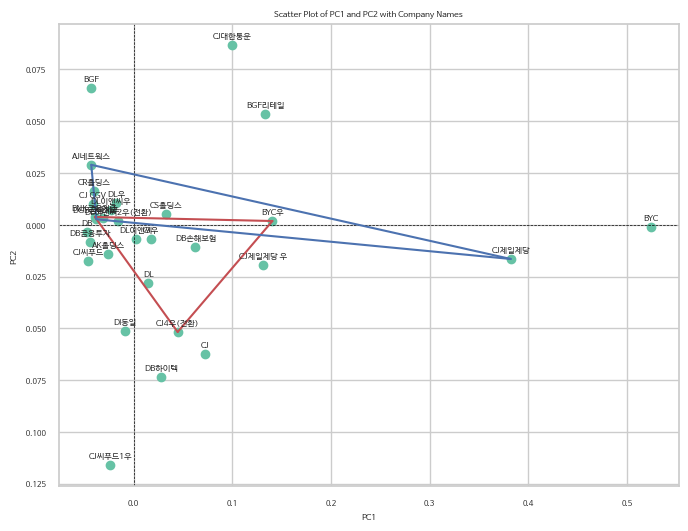

In [ ]:
final_df['OX'] = 0

# 5개의 행에 랜덤으로 1 할당
random_rows = np.random.choice(final_df.index, 5, replace=False)
final_df.loc[random_rows, 'OX'] = 1

# 선택된 행을 제외하고 나머지 중에서 6개를 2로 채우기
remaining_rows = final_df[final_df['OX'] == 0].index.difference(random_rows)
additional_rows = np.random.choice(remaining_rows, 6, replace=False)
final_df.loc[additional_rows, 'OX'] = 2

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
from scipy.spatial import ConvexHull

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])

# Annotate points with 종목명
for i in range(len(final_df)):
    plt.annotate(final_df['종목명'][i], (final_df['PC1'][i], final_df['PC2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2 with Company Names')

# OX 값이 1인 행만 선택
selected_rows_ox1 = final_df[final_df['OX'] == 1]

# Convex Hull 알고리즘을 사용하여 1로 표시된 다각형 그리기
hull_ox1 = ConvexHull(selected_rows_ox1[['PC1', 'PC2']])
for simplex in hull_ox1.simplices:
    plt.plot(selected_rows_ox1['PC1'].values[simplex], selected_rows_ox1['PC2'].values[simplex], 'r-')

# OX 값이 2인 행만 선택
selected_rows_ox2 = final_df[final_df['OX'] == 2]

# Convex Hull 알고리즘을 사용하여 2로 표시된 다각형 그리기
hull_ox2 = ConvexHull(selected_rows_ox2[['PC1', 'PC2']])
for simplex in hull_ox2.simplices:
    plt.plot(selected_rows_ox2['PC1'].values[simplex], selected_rows_ox2['PC2'].values[simplex], 'b-')

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('scatter_plot_with_multiple_convex_hulls.png', dpi=300)

# Show the plot
plt.show()

합집합 면적 : 0.012836768021282882
교집합 면적 : 0.004868924301505725
IOU : 0.3792951850055427


<ipython-input-145-0d5ba9fac97c>:35: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('iou1.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


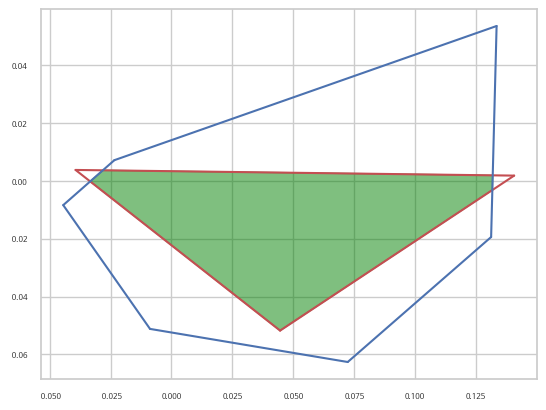

In [ ]:
from shapely.geometry import Polygon

# Convex Hull 알고리즘을 사용하여 1로 표시된 다각형 그리기
hull_ox1 = ConvexHull(selected_rows_ox1[['PC1', 'PC2']])
polygon_ox1 = Polygon(selected_rows_ox1[['PC1', 'PC2']].values[hull_ox1.vertices])
for simplex in hull_ox1.simplices:
    plt.plot(selected_rows_ox1['PC1'].values[simplex], selected_rows_ox1['PC2'].values[simplex], 'r-')

# Convex Hull 알고리즘을 사용하여 2로 표시된 다각형 그리기
hull_ox2 = ConvexHull(selected_rows_ox2[['PC1', 'PC2']])
polygon_ox2 = Polygon(selected_rows_ox2[['PC1', 'PC2']].values[hull_ox2.vertices])
for simplex in hull_ox2.simplices:
    plt.plot(selected_rows_ox2['PC1'].values[simplex], selected_rows_ox2['PC2'].values[simplex], 'b-')

# 합집합 면적 계산
union_area = polygon_ox1.union(polygon_ox2).area

# 교집합 면적 계산
intersection_area = polygon_ox1.intersection(polygon_ox2).area

# 결과 출력
print("합집합 면적 :", union_area)
print("교집합 면적 :", intersection_area)
print('IOU :', intersection_area / union_area)

# 교집합 부분 그리기
intersection_polygon = polygon_ox1.intersection(polygon_ox2)
if intersection_polygon.is_empty:
    print("교집합이 없습니다.")
else:
    x, y = intersection_polygon.exterior.xy
    plt.fill(x, y, color='green', alpha=0.5)

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('iou1.png', dpi=300)

<ipython-input-142-b2b91d970f95>:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('scatter_plot_with_multiple_convex_hulls2.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


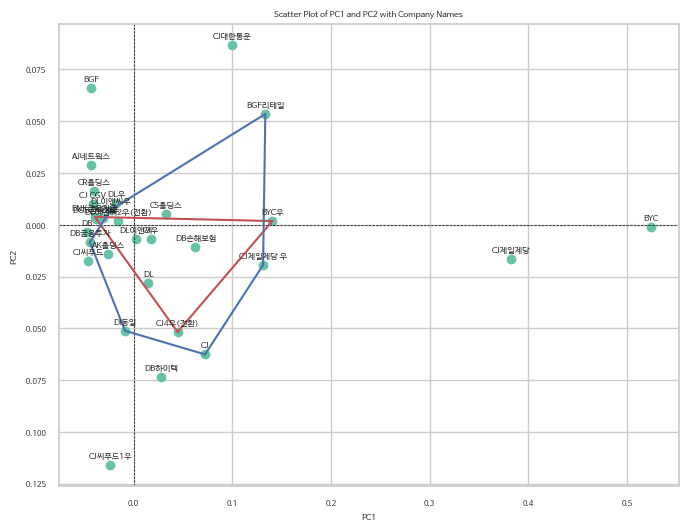

In [ ]:
final_df.loc[final_df['OX']==3, ['OX']] = 0

# 선택된 행을 제외하고 나머지 중에서 6개를 3로 채우기
remaining_rows = final_df[final_df['OX'] == 0].index.difference(random_rows)
additional_rows = np.random.choice(remaining_rows, 6, replace=False)
final_df.loc[additional_rows, 'OX'] = 3

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])

#-------------------------------------------------------------------------------
# Annotate points with 종목명
for i in range(len(final_df)):
    plt.annotate(final_df['종목명'][i], (final_df['PC1'][i], final_df['PC2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2 with Company Names')

# OX 값이 1인 행만 선택
selected_rows_ox1 = final_df[final_df['OX'] == 1]

# Convex Hull 알고리즘을 사용하여 1로 표시된 다각형 그리기
hull_ox1 = ConvexHull(selected_rows_ox1[['PC1', 'PC2']])
for simplex in hull_ox1.simplices:
    plt.plot(selected_rows_ox1['PC1'].values[simplex], selected_rows_ox1['PC2'].values[simplex], 'r-')

# OX 값이 2인 행만 선택
selected_rows_ox2 = final_df[final_df['OX'] == 3]

# Convex Hull 알고리즘을 사용하여 2로 표시된 다각형 그리기
hull_ox2 = ConvexHull(selected_rows_ox2[['PC1', 'PC2']])
for simplex in hull_ox2.simplices:
    plt.plot(selected_rows_ox2['PC1'].values[simplex], selected_rows_ox2['PC2'].values[simplex], 'b-')

# 그래프 표시 및 저장 (해상도 조절)
plt.savefig('scatter_plot_with_multiple_convex_hulls2.png', dpi=300)

# Show the plot
plt.show()

합집합 면적 : 0.012836768021282882
교집합 면적 : 0.004868924301505725
IOU : 0.3792951850055427


<ipython-input-143-b8686f86ecfc>:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('iou2.png', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


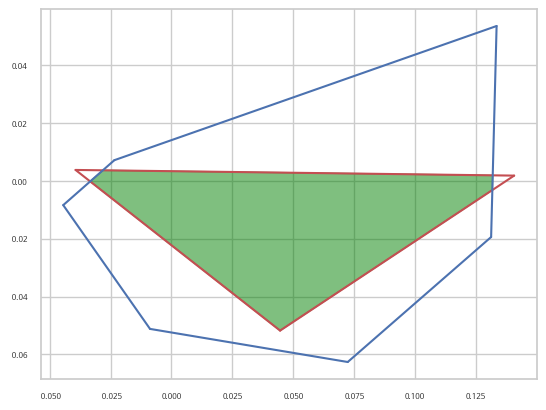

In [ ]:
from shapely.geometry import Polygon

# Convex Hull 알고리즘을 사용하여 1로 표시된 다각형 그리기
hull_ox1 = ConvexHull(selected_rows_ox1[['PC1', 'PC2']])
polygon_ox1 = Polygon(selected_rows_ox1[['PC1', 'PC2']].values[hull_ox1.vertices])
for simplex in hull_ox1.simplices:
    plt.plot(selected_rows_ox1['PC1'].values[simplex], selected_rows_ox1['PC2'].values[simplex], 'r-')

# Convex Hull 알고리즘을 사용하여 2로 표시된 다각형 그리기
hull_ox2 = ConvexHull(selected_rows_ox2[['PC1', 'PC2']])
polygon_ox2 = Polygon(selected_rows_ox2[['PC1', 'PC2']].values[hull_ox2.vertices])
for simplex in hull_ox2.simplices:
    plt.plot(selected_rows_ox2['PC1'].values[simplex], selected_rows_ox2['PC2'].values[simplex], 'b-')

# 합집합 면적 계산
union_area = polygon_ox1.union(polygon_ox2).area

# 교집합 면적 계산
intersection_area = polygon_ox1.intersection(polygon_ox2).area

# 결과 출력
print("합집합 면적 :", union_area)
print("교집합 면적 :", intersection_area)
print('IOU :', intersection_area / union_area)

# 교집합 부분 그리기
intersection_polygon = polygon_ox1.intersection(polygon_ox2)
if intersection_polygon.is_empty:
    print("교집합이 없습니다.")
else:
    x, y = intersection_polygon.exterior.xy
    plt.fill(x, y, color='green', alpha=0.5)

plt.savefig('iou2.png', dpi=300)

# 전체 데이터 PCA

In [ ]:
# all_df = pd.read_csv('/content/drive/MyDrive/hana/data/all.csv', encoding='cp949')
# all_df = all_df.drop(columns=col).set_index('종목명').drop(columns=['시장구분', '소속부'])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Min-Max 스케일러 생성
# all_scaler = MinMaxScaler()

# all_scaled_data = all_scaler.fit_transform(all_df)

# all_scaled_df = pd.DataFrame(all_scaled_data, columns=all_df.columns)

In [ ]:
# from sklearn.decomposition import PCA
# # PCA 모델 생성
# pca2 = PCA()

# # 데이터를 통해 PCA 모델 학습
# pca2.fit(all_scaled_df)

# # 누적 설명된 분산 비율 계산
# cumulative_variance_ratio = pca2.explained_variance_ratio_.cumsum()

# # 주성분 중요도 확인
# print("Cumulative Explained Variance Ratio:")
# print(cumulative_variance_ratio)